In [1]:
from pandas import Series
import datetime
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

def _get_world_json():
    url = 'https://pomber.github.io/covid19/timeseries.json'
    r = requests.get(url)
    try:
        r.raise_for_status()
        return r.json()
    except:
        return None
    
def worlddf():
    countries=['China', 'US', 'United Kingdom', 'Italy', 'France', 'Germany', 'Spain', 'Iran', 'India', 'Turkey',
               'Russia', 'Brazil', 'Canada', 'Belgium', 'Netherlands', 'Switzerland', 'Peru']
    json1=_get_world_json()
    dates=[]
    china=[]
    us=[]
    uk=[]
    italy=[]
    france=[]
    germany=[]
    spain=[]
    iran=[]
    india=[]
    turkey=[]
    russia=[]
    brazil=[]
    canada=[]
    belgium=[]
    netherlands=[]
    switzerland=[]
    peru=[]
    
    allc=[china, us,uk, italy, france, germany, spain, iran, india, turkey, russia, brazil, canada, belgium, netherlands, 
         switzerland, peru]
    i=0
    df=pd.DataFrame()

    
    for items in json1['US']:
        newdate=datetime.datetime.strptime(items['date'], '%Y-%m-%d')
        #print(newdate)
        dates.append(newdate.date())
    for items in json1['China']:
        china.append(items['confirmed'])
    for items in json1['US']:
        us.append(items['confirmed'])
    for items in json1['United Kingdom']:
        uk.append(items['confirmed'])
    for items in json1['Italy']:
        italy.append(items['confirmed'])
    for items in json1['France']:
        france.append(items['confirmed'])
    for items in json1['Germany']:
        germany.append(items['confirmed'])
    for items in json1['Spain']:
        spain.append(items['confirmed'])
    for items in json1['Iran']:
        iran.append(items['confirmed'])
    for items in json1['India']:
        india.append(items['confirmed'])
    for items in json1['Turkey']:
        turkey.append(items['confirmed'])
    for items in json1['Russia']:
        russia.append(items['confirmed'])
    for items in json1['Brazil']:
        brazil.append(items['confirmed'])
    for items in json1['Canada']:
        canada.append(items['confirmed'])
    for items in json1['Belgium']:
        belgium.append(items['confirmed'])
    for items in json1['Netherlands']:
        netherlands.append(items['confirmed'])
    for items in json1['Switzerland']:
        switzerland.append(items['confirmed'])
    for items in json1['Peru']:
        peru.append(items['confirmed'])
        #print(len(india))
    #if len(dates)==len(india):
    j=dates
    
    ls=[]
    ls2=[]
    for count,c in enumerate(countries):
        j=dates
        i=allc[count]
        #print('j',type(j))
        #print('i',type(i))
        #print(j)
        sets=zip(i,j)
        for i, j in sets:
            ls=[c, i, j]
            ls2.append(ls)
            ls=[]
            
        
    
    df['date']=pd.Series(dates,index=range(len(dates)))
    df['china']=pd.Series(china,index=range(len(dates)))
    df['us']=pd.Series(us,index=range(len(dates)))
    df['uk']=pd.Series(uk,index=range(len(dates)))
    df['italy']=pd.Series(italy,index=range(len(dates)))
    df['france']=pd.Series(france,index=range(len(dates)))
    df['germany']=pd.Series(germany,index=range(len(dates)))
    df['spain']=pd.Series(spain,index=range(len(dates)))
    df['iran']=pd.Series(iran,index=range(len(dates)))
    df['india']=pd.Series(india,index=range(len(dates)))
    df['turkey']=pd.Series(turkey,index=range(len(dates)))
    df['russia']=pd.Series(russia,index=range(len(dates)))
    df['brazil']=pd.Series(brazil,index=range(len(dates)))
    df['canada']=pd.Series(canada,index=range(len(dates)))
    df['belgium']=pd.Series(belgium,index=range(len(dates)))
    df['netherlands']=pd.Series(netherlands,index=range(len(dates)))
    df['switzerland']=pd.Series(switzerland,index=range(len(dates)))
    df['peru']=pd.Series(peru,index=range(len(dates)))
    #print(peru)

    total=[0 for i in range(len(df.columns.values))]
    total=pd.Series(total, index=df.columns.values)
    df.append(total, ignore_index=True)
    print(df.shape)
    return df, ls2

df,ls2=worlddf()

(97, 18)


In [2]:
df=pd.DataFrame(ls2,columns=['Country','Cases','Date'])
df.head(3)

,Country,Cases,Date
0,China,548,2020-01-22
1,China,643,2020-01-23
2,China,920,2020-01-24


In [3]:
countries=['China', 'US', 'United Kingdom', 'Italy', 'France', 'Germany', 'Spain', 'Iran', 'India', 'Turkey',
               'Russia', 'Brazil', 'Canada', 'Belgium', 'Netherlands', 'Switzerland', 'Peru']
colors = dict(zip(
    countries,
    ['#FF6F61','#6B5B95','#88B04B','#F7CAC9','#92A8D1','#955251','#B565A7','#009B77',
'#DD4124','#D65076','#45B8AC','#EFC050','#5B5EA6','#9B2335','#DFCFBE',
'#55B4B0','#E15D44']))

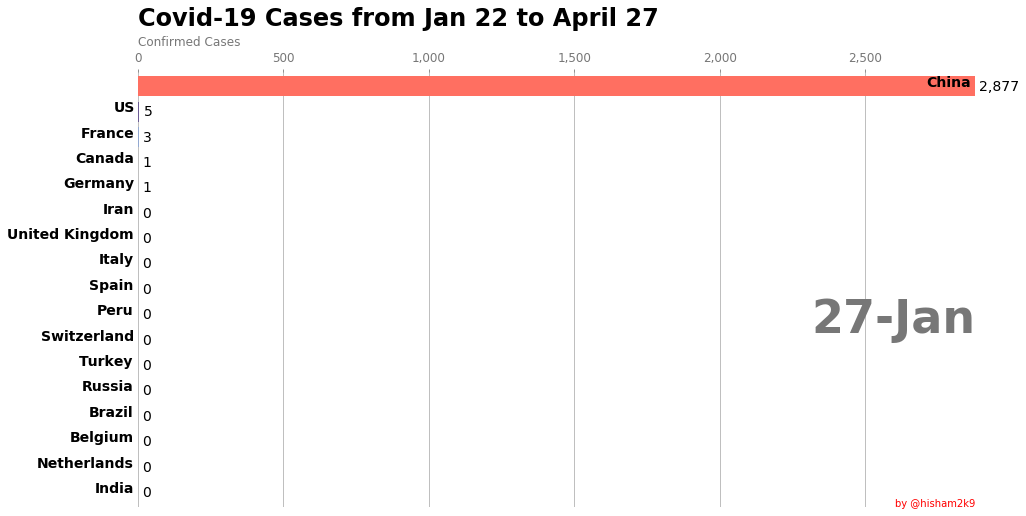

In [10]:
fig, pt = plt.subplots(figsize=(15, 8))

def barchart_race(current_year):
    #print(type(current_year))
    dff = df[df['Date'].eq(current_year)].sort_values(by='Cases', ascending=True).tail(18)
    pt.clear()
    pt.barh(dff['Country'], dff['Cases'], color=[colors[x] for x in dff['Country']])
    dx = dff['Cases'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Cases'], dff['Country'])):
        pt.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='baseline')
        pt.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    pt.text(1, 0.4, current_year.strftime("%d-%b"), transform=pt.transAxes, color='#777777', size=46, ha='right', weight=800)
    pt.text(0, 1.06, 'Confirmed Cases', transform=pt.transAxes, size=12, color='#777777')
    pt.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    pt.xaxis.set_ticks_position('top')
    pt.tick_params(axis='x', colors='#777777', labelsize=12)
    pt.set_yticks([])
    pt.margins(0, 0.01)
    pt.grid(which='major', axis='x', linestyle='-')
    pt.set_axisbelow(True)
    pt.text(0, 1.15, 'Covid-19 Cases from Jan 22 to April 27',
            transform=pt.transAxes, size=24, weight=600, ha='left', va='top')
    pt.text(1, 0, 'by @hisham2k9', transform=pt.transAxes, color='red', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
barchart_race((datetime.date(2020,1,27)))

In [ ]:
fig, pt = plt.subplots(figsize=(15, 8))
datelist=[]
for item in pd.date_range(start=datetime.date(2020,1,22),end=datetime.date(2020,4,27)):
    datelist.append(item.date())
#print(datelist)
animator = animation.FuncAnimation(fig, barchart_race, 
                            frames=datelist)

HTML(animator.to_html5_video())
#HTML(animator.to_jshtml())
#animator.save()